In [1]:
# Import required libraries and dependencies

# Import the required modules
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import hvplot.pandas

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.cluster import KMeans, AgglomerativeClustering, Birch
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [4]:
df_market_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41 entries, bitcoin to digibyte
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price_change_percentage_24h   41 non-null     float64
 1   price_change_percentage_7d    41 non-null     float64
 2   price_change_percentage_14d   41 non-null     float64
 3   price_change_percentage_30d   41 non-null     float64
 4   price_change_percentage_60d   41 non-null     float64
 5   price_change_percentage_200d  41 non-null     float64
 6   price_change_percentage_1y    41 non-null     float64
dtypes: float64(7)
memory usage: 2.6+ KB


In [5]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

In [6]:
df_market_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41 entries, bitcoin to digibyte
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price_change_percentage_24h   41 non-null     float64
 1   price_change_percentage_7d    41 non-null     float64
 2   price_change_percentage_14d   41 non-null     float64
 3   price_change_percentage_30d   41 non-null     float64
 4   price_change_percentage_60d   41 non-null     float64
 5   price_change_percentage_200d  41 non-null     float64
 6   price_change_percentage_1y    41 non-null     float64
dtypes: float64(7)
memory usage: 2.6+ KB


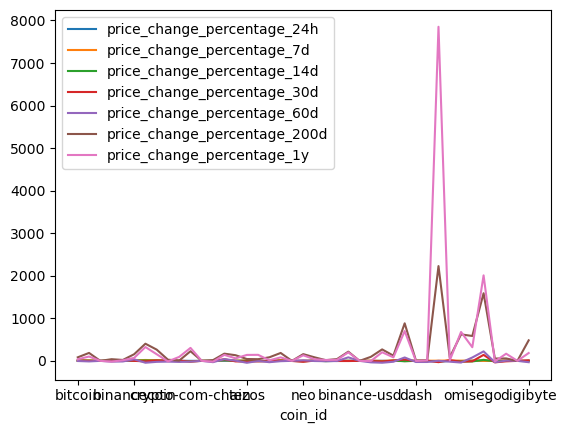

In [7]:
df_market_data.plot()
plt.show() #show the plot

---

### Prepare the Data

In [9]:
df_market_data.columns

Index(['price_change_percentage_24h', 'price_change_percentage_7d',
       'price_change_percentage_14d', 'price_change_percentage_30d',
       'price_change_percentage_60d', 'price_change_percentage_200d',
       'price_change_percentage_1y'],
      dtype='object')

In [8]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_market_data)

In [12]:
# Create a DataFrame with the scaled data
# Copy the crypto names from the original DataFrame
# Set the coin_id column as index
scaled_df = pd.DataFrame(scaled_data, index=df_market_data.index, columns=df_market_data.columns)

# Display the scaled DataFrame
scaled_df.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


In [13]:
scaled_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,4.100000e+01,4.100000e+01,4.100000e+01,4.100000e+01,4.100000e+01,4.100000e+01
mean,0.000000,1.895503e-16,2.707861e-17,2.978647e-17,-5.415722e-18,-1.326852e-16,4.197185e-17
std,1.012423,1.012423e+00,1.012423e+00,1.012423e+00,1.012423e+00,1.012423e+00,1.012423e+00
min,-4.981042,-1.682027e+00,-2.217108e+00,-1.393153e+00,-9.560487e-01,-5.511464e-01,-2.963296e-01
25%,-0.127467,-7.066688e-01,-6.299628e-01,-4.605580e-01,-5.517599e-01,-4.998478e-01,-2.817468e-01
50%,0.077497,-1.906843e-01,-9.190922e-03,-6.103015e-02,-1.592496e-01,-3.550537e-01,-2.255326e-01
75%,0.331280,4.931931e-01,6.435649e-01,1.165382e-01,1.606038e-02,-4.736110e-02,-1.454693e-01
max,1.919812,2.572251e+00,2.907054e+00,5.351455e+00,4.769913e+00,4.632380e+00,6.088625e+00


Examine in 2D with TSNE

In [21]:
# TSNE with unscaled data
tsne_unscaled = TSNE(n_components=2, random_state=42)
tsne_features_unscaled = tsne_unscaled.fit_transform(df_market_data)

# Create a DataFrame for unscaled TSNE
tsne_unscaled_df = pd.DataFrame(
    tsne_features_unscaled,
    index=df_market_data.index,
    columns=['TSNE1', 'TSNE2'])

In [22]:
# Plot unscaled TSNE
unscaled_plot = tsne_unscaled_df.hvplot.scatter(
    x="TSNE1",
    y="TSNE2",
    title="TSNE Visualization (Unscaled Data)",)
unscaled_plot

:Scatter   [TSNE1]   (TSNE2)

In [25]:
# TSNE with scaled data
tsne_scaled = TSNE(n_components=2, random_state=42)
tsne_features_scaled = tsne_scaled.fit_transform(scaled_df)

# Create a DataFrame for scaled TSNE
tsne_scaled_df = pd.DataFrame(
    tsne_features_scaled,
    index=scaled_df.index,
    columns=['TSNE1', 'TSNE2'])


In [26]:
# Plot scaled TSNE
scaled_plot = tsne_scaled_df.hvplot.scatter(
    x="TSNE1",
    y="TSNE2",
    title="TSNE Visualization (Scaled Data)",)
scaled_plot

:Scatter   [TSNE1]   (TSNE2)

Check for Multicollinearity 

In [27]:
 # Correlations
corrs = df_market_data.corr()
corrs

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
price_change_percentage_24h,1.000000,0.169659,0.279682,0.292563,0.136974,-0.541190,-0.750630
price_change_percentage_7d,0.169659,1.000000,0.538294,0.056899,-0.145099,-0.052533,-0.038424
price_change_percentage_14d,0.279682,0.538294,1.000000,0.658040,0.376108,-0.039086,-0.116632
price_change_percentage_30d,0.292563,0.056899,0.658040,1.000000,0.745248,0.324777,0.016078
price_change_percentage_60d,0.136974,-0.145099,0.376108,0.745248,1.000000,0.499102,0.211242
price_change_percentage_200d,-0.541190,-0.052533,-0.039086,0.324777,0.499102,1.000000,0.879873
price_change_percentage_1y,-0.750630,-0.038424,-0.116632,0.016078,0.211242,0.879873,1.000000


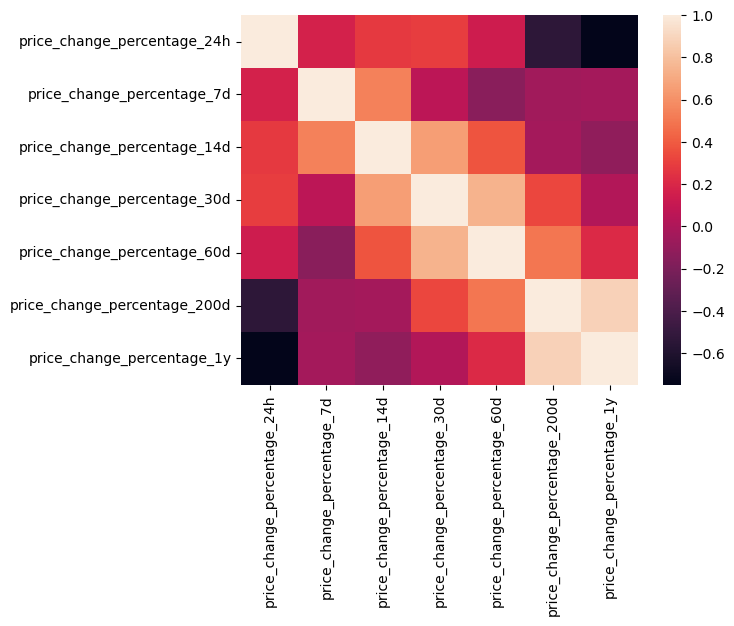

In [28]:
sns.heatmap(corrs)
plt.show()

In [ ]:
# WE HAVE MULTICOLLINEARITY
# THIS MEANS THAT WE CAN REDUCE OUR FEATURE SET BY USING PRINCIPAL COMPONENTS

### Find the Best Value for k Using the Original Scaled DataFrame.

In [38]:
# KMeans on SCALED (not PCA) DATA
X = scaled_df

# Create lists to store metrics
inertia = []
s_scores = []
vrc_scores = []

k_values = list(range(2, 10))  # Start from 2 clusters

# Loop through k values
for k in k_values:
    # Fit the KMeans model
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

    # Calculate Silhouette Score
    preds = kmeans.predict(X)
    s_score = silhouette_score(X, preds)
    s_scores.append(s_score)

    # Calculate Calinski-Harabasz Score (Variance Ratio Criterion)
    vrc_score = calinski_harabasz_score(X, preds)
    vrc_scores.append(vrc_score)

# Create a DataFrame to hold the metrics
metrics = {"k": k_values, "inertia": inertia, "s_score": s_scores, "vrc_score": vrc_scores}
df_metrics = pd.DataFrame(metrics)

# Display the metrics DataFrame
print(df_metrics.head(10))

# Plot the Elbow curve (Inertia)
elbow_plot = df_metrics.hvplot.line(x="k", y="inertia", title="Elbow Curve (Scaled Data)")

# Plot Silhouette Scores
silhouette_plot = df_metrics.hvplot.line(x="k", y="s_score", title="Silhouette Scores (Scaled Data)")

# Plot Calinski-Harabasz Scores
vrc_plot = df_metrics.hvplot.line(x="k", y="vrc_score", title=" calinski_harabasz_score (Scaled Data)")

# Display the plots
elbow_plot


   k     inertia   s_score  vrc_score
0  2  212.123342  0.690885  13.766470
1  3  165.136752  0.260810  14.021117
2  4   79.022435  0.314482  32.459853
3  5   66.413051  0.323913  29.892958
4  6   61.634088  0.251616  25.595599
5  7   46.074467  0.258868  29.631263
6  8   43.392694  0.252185  26.466078
7  9   32.913223  0.260185  30.879599


:Curve   [k]   (inertia)

In [ ]:
#elbow plot : 4, 

In [33]:
# Create an empty list to store the inertia values


# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list

k_values = list(range(1, 12))
inertia = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(scaled_df)
    inertia.append(kmeans.inertia_)
elbow_data = {"k": k_values, "inertia": inertia}
elbow_df = pd.DataFrame(elbow_data)
elbow_df.hvplot.line(x="k", y="inertia", title="Elbow Curve (Scaled Data)")

:Curve   [k]   (inertia)

In [34]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k_values, "inertia": inertia}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

In [35]:
elbow_df.head()

,k,inertia
0,1,287.000000
1,2,198.571818
2,3,145.635748
3,4,79.022435
4,5,66.217780


In [37]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
elbow_df.hvplot.line(x="k", y="inertia", title="Elbow Curve (Scaled Data)")

:Curve   [k]   (inertia)

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** 4

---

 Agglomerative (Hierarchical)

In [39]:
# Create a a list to store metric values and the values of k
s_scores = []
vrc_scores = []

k = list(range(2, 20))

# LOOP 
for i in k:
    # Fit the Model
    model = AgglomerativeClustering(n_clusters=i)
    model.fit(X)

    # Silhoutte Score
    preds = model.labels_  # FIX: Use `labels_` instead of `predict()`
    s_score = silhouette_score(X, preds)
    s_scores.append(s_score)

    # Variance Ratio Criterion
    vrc_score = calinski_harabasz_score(X, preds)
    vrc_scores.append(vrc_score)

# Define a DataFrame to hold the values for k and the corresponding inertia
metrics = {"k": k, "s_score": s_scores, "vrc_scores": vrc_scores}
df_metrics = pd.DataFrame(metrics)

# Review the DataFrame
df_metrics.head(10)

,k,s_score,vrc_scores
0,2,0.707392,18.399507
1,3,0.702822,25.264783
2,4,0.340837,28.413892
3,5,0.276114,30.023823
4,6,0.277295,29.858770
5,7,0.276363,30.467052
6,8,0.198534,31.166776
7,9,0.201693,30.667151
8,10,0.199804,31.005396
9,11,0.206917,31.424703


Birch

In [40]:
# Create a a list to store metric values and the values of k
s_scores = []
vrc_scores = []

k = list(range(2, 20))

# LOOP 
for i in k:
    # Fit the Model
    model = Birch(n_clusters=i)
    model.fit(X)

    # Silhoutte Score
    preds = model.labels_  # FIX: Use `labels_` instead of `predict()`
    s_score = silhouette_score(X, preds)
    s_scores.append(s_score)

    # Variance Ratio Criterion
    vrc_score = calinski_harabasz_score(X, preds)
    vrc_scores.append(vrc_score)

# Define a DataFrame to hold the values for k and the corresponding inertia
metrics = {"k": k, "s_score": s_scores, "vrc_scores": vrc_scores}
df_metrics = pd.DataFrame(metrics)

# Review the DataFrame
df_metrics.head(10)

,k,s_score,vrc_scores
0,2,0.707392,18.399507
1,3,0.702822,25.264783
2,4,0.340837,28.413892
3,5,0.336476,27.695263
4,6,0.185448,29.126884
5,7,0.193982,29.159036
6,8,0.197678,28.717616
7,9,0.194521,27.594528
8,10,0.194966,27.529234
9,11,0.227577,33.233982


Cluster Cryptocurrencies with K-means Using the Original Scaled DataFrame

In [41]:
# Initialize the K-Means model using the best value for k
best_k = 4  # Replace with your best k value
kmeans = KMeans(n_clusters=best_k, random_state=0)


In [42]:
# Fit the K-Means model using the scaled DataFrame
clusters = kmeans.fit_predict(scaled_df)

In [ ]:
# Predict the clusters to group the cryptocurrencies using the scaled DataFrame


# Print the resulting array of cluster values.


In [ ]:
# Create a copy of the scaled DataFrame


In [46]:
# Add a new column to the copy of the scaled DataFrame with the predicted clusters
clustered_df = scaled_df.copy()
clustered_df['cluster'] = clusters

# Display the copy of the scaled DataFrame
clustered_df.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2


In [56]:
# Create a DataFrame for scaled TSNE
tsne_scaled_df = pd.DataFrame(
    tsne_features_scaled,
    index=scaled_df.index,
    columns=['TSNE1', 'TSNE2']
)

# Add the cluster labels from clustered_df to the TSNE DataFrame
tsne_scaled_df['cluster'] = clustered_df['cluster']

# Plot scaled TSNE with cluster colors
scaled_plot = tsne_scaled_df.hvplot.scatter(
    x="TSNE1",
    y="TSNE2",
    by="cluster",
    title="TSNE Visualization with Clusters (Scaled Data)",
)

# Display the plot
scaled_plot

:NdOverlay   [cluster]
   :Scatter   [TSNE1]   (TSNE2)

In [47]:
# Create a scatter plot using hvPlot by setting
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.
clustered_df.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    by="cluster",
    hover_cols=["coin_id"],
    title="Crypto Clusters (Scaled Data)"
)

:NdOverlay   [cluster]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [57]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)


In [58]:
# Use the PCA model with `fit_transform` to reduce the original scaled DataFrame
# down to three principal components.
crypto_pca = pca.fit_transform(scaled_df)
pca_df = pd.DataFrame(crypto_pca, index=scaled_df.index, columns=["PC1", "PC2", "PC3"])
# View the scaled PCA data
pca_df.head()

,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


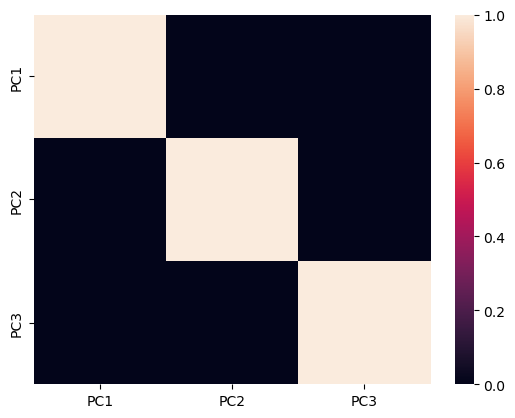

In [59]:
corrs = pca_df.corr()
sns.heatmap(corrs)
plt.show()

In [ ]:
# Retrieve the explained variance to determine how much information
# can be attributed to each principal component.


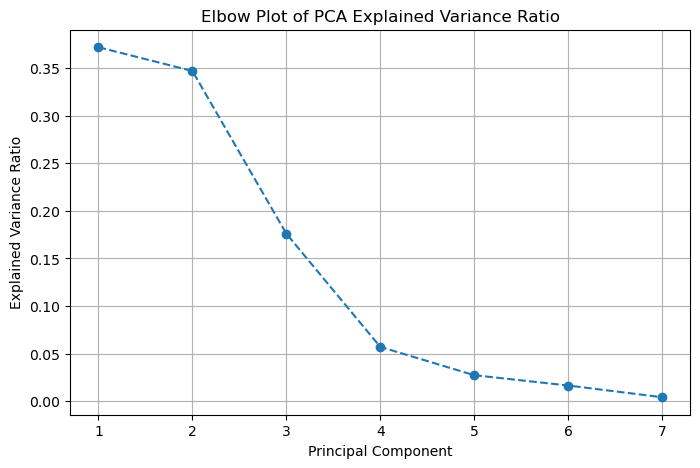


Cumulative Explained Variance:
[0.3719856  0.71899373 0.89503166 0.95208839 0.97938593 0.99584914
 1.        ]


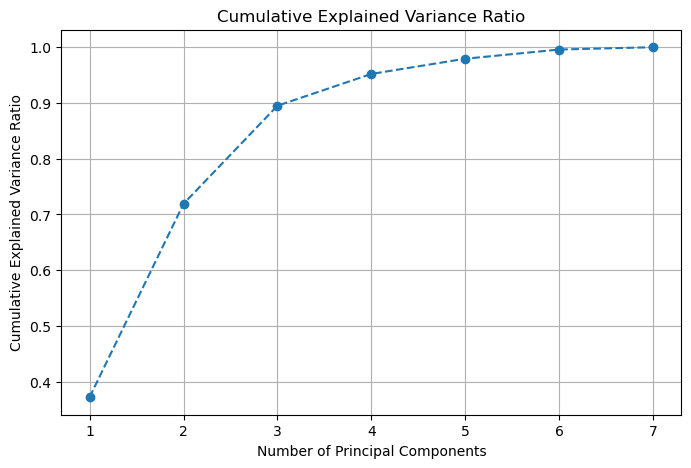


Optimal number of principal components to keep: 4

Optimal PCA DataFrame:
                   PC1       PC2       PC3       PC4
coin_id                                             
bitcoin      -0.600667  0.842760  0.461595 -0.109151
ethereum     -0.458261  0.458466  0.952877  0.095100
tether       -0.433070 -0.168126 -0.641752 -0.470282
ripple       -0.471835 -0.222660 -0.479053 -0.737473
bitcoin-cash -1.157800  2.041209  1.859715  0.236479


In [60]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming you already have your scaled_df DataFrame

# Set the number of principal components to analyze
n_components = len(scaled_df.columns)  

# Create a PCA model instance
pca = PCA(n_components=n_components)

# Fit and transform the scaled data
crypto_pca = pca.fit_transform(scaled_df)

# Retrieve the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Create a DataFrame from the explained variance ratio
df2 = pd.DataFrame({
    'Principal Component': range(1, n_components + 1),
    'Explained Variance Ratio': explained_variance_ratio
})

# Plot the elbow plot
plt.figure(figsize=(8, 5))
plt.plot(df2['Principal Component'], df2['Explained Variance Ratio'], marker='o', linestyle='--')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Elbow Plot of PCA Explained Variance Ratio')
plt.grid(True)
plt.show()

# Optional: Calculate and display cumulative explained variance
cumulative_variance = explained_variance_ratio.cumsum()
print("\nCumulative Explained Variance:")
print(cumulative_variance)

# Optional: Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, n_components + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()

#Determine the number of components to keep.
optimal_components = 0
for i, variance in enumerate(cumulative_variance):
    if variance >= 0.90: #keep 90% of variance
        optimal_components = i+1
        break

print(f"\nOptimal number of principal components to keep: {optimal_components}")

# Re-run PCA with the optimal number of components
pca_optimal = PCA(n_components=optimal_components)
crypto_pca_optimal = pca_optimal.fit_transform(scaled_df)

# Create a DataFrame from the optimal PCA results.
pca_df_optimal = pd.DataFrame(crypto_pca_optimal, index=scaled_df.index, columns=[f"PC{i+1}" for i in range(optimal_components)])

print("\nOptimal PCA DataFrame:")
print(pca_df_optimal.head())

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 

In [ ]:
# Create a new DataFrame with the PCA data.


# Copy the crypto names from the original scaled DataFrame


# Set the coin_id column as index


# Display the scaled PCA DataFrame


---

### Find the Best Value for k Using the Scaled PCA DataFrame

In [ ]:
# Create a list with the number of k-values from 1 to 11


In [ ]:
# Create an empty list to store the inertia values


# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list


In [ ]:
# Create a dictionary with the data to plot the Elbow curve

# Create a DataFrame with the data to plot the Elbow curve


In [ ]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.


In [61]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    # 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans = KMeans(n_clusters=k, random_state=0)
    # 2. Fit the model to the data using pca_df
    kmeans.fit(pca_df)
    # 3. Append the model.inertia_ to the inertia list
    inertia.append(kmeans.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k_values, "inertia": inertia}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
elbow_plot = elbow_df.hvplot.line(x="k", y="inertia", title="Elbow Curve (PCA Data)")

# Display the plot
elbow_plot

:Curve   [k]   (inertia)

In [62]:
elbow_df

,k,inertia
0,1,256.874086
1,2,168.811896
2,3,115.918077
3,4,49.665497
4,5,41.357314
5,6,30.796642
6,7,25.915457
7,8,21.890936
8,9,17.720699
9,10,13.838699


#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:k=4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer: No

### Cluster Cryptocurrencies with K-means Using the Scaled PCA DataFrame

In [ ]:
# Initialize the K-Means model using the best value for k


In [ ]:
# Fit the K-Means model using the PCA data


In [ ]:
# Predict the clusters to group the cryptocurrencies using the scaled PCA DataFrame


# Print the resulting array of cluster values.


In [ ]:
# Create a copy of the scaled PCA DataFrame


# Add a new column to the copy of the PCA DataFrame with the predicted clusters


# Display the copy of the scaled PCA DataFrame


In [ ]:
# Create a scatter plot using hvPlot by setting
# `x="PC1"` and `y="PC2"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.


In [63]:
# Initialize the K-Means model using the best value for k
best_k = 4  
kmeans = KMeans(n_clusters=best_k, random_state=0)

# Fit the K-Means model using the PCA data
kmeans.fit(pca_df)

# Predict the clusters to group the cryptocurrencies using the scaled PCA DataFrame
clusters = kmeans.predict(pca_df)

# Print the resulting array of cluster values.
print(clusters)

# Create a copy of the scaled PCA DataFrame
clustered_pca_df = pca_df.copy()

# Add a new column to the copy of the PCA DataFrame with the predicted clusters
clustered_pca_df['cluster'] = clusters

# Display the copy of the scaled PCA DataFrame
print(clustered_pca_df.head())

# Create a scatter plot using hvPlot by setting
# `x="PC1"` and `y="PC2"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.

# Obtain the original coin_id index from scaled_df
clustered_pca_df['coin_id'] = clustered_pca_df.index

scatter_plot = clustered_pca_df.hvplot.scatter(
    x="PC1",
    y="PC2",
    by="cluster",
    hover_cols=["coin_id"],
    title="K-means Clusters (PCA Data)"
)

# Display the plot
scatter_plot

[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 1 2 0 0 3
 0 0 0 0]
                   PC1       PC2       PC3  cluster
coin_id                                            
bitcoin      -0.600667  0.842760  0.461595        2
ethereum     -0.458261  0.458466  0.952877        2
tether       -0.433070 -0.168126 -0.641752        0
ripple       -0.471835 -0.222660 -0.479053        0
bitcoin-cash -1.157800  2.041209  1.859715        2


:NdOverlay   [cluster]
   :Scatter   [PC1]   (PC2,coin_id)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

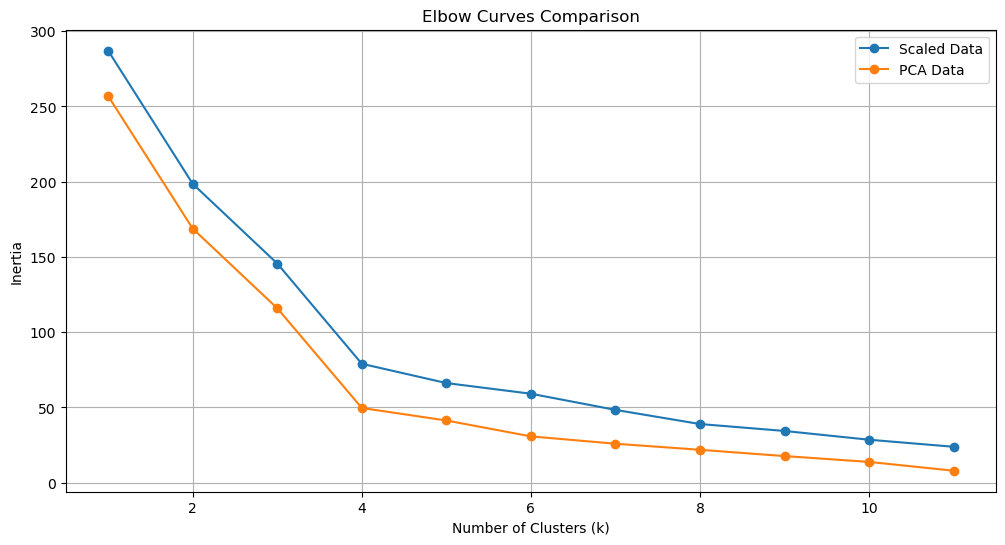

In [65]:
# Composite plot to contrast the Elbow curves
# Elbow curve for original scaled data
inertia_scaled = []
k_values_scaled = list(range(1, 12))
for k in k_values_scaled:
    kmeans_scaled = KMeans(n_clusters=k, random_state=0)
    kmeans_scaled.fit(scaled_df)
    inertia_scaled.append(kmeans_scaled.inertia_)
elbow_scaled_df = pd.DataFrame({"k": k_values_scaled, "inertia": inertia_scaled})

# Elbow curve for PCA data
inertia_pca = []
k_values_pca = list(range(1, 12))
for k in k_values_pca:
    kmeans_pca = KMeans(n_clusters=k, random_state=0)
    kmeans_pca.fit(pca_df)
    inertia_pca.append(kmeans_pca.inertia_)
elbow_pca_df = pd.DataFrame({"k": k_values_pca, "inertia": inertia_pca})

# Composite Plot (Elbow Curves)
plt.figure(figsize=(12, 6))
plt.plot(elbow_scaled_df['k'], elbow_scaled_df['inertia'], marker='o', label='Scaled Data')
plt.plot(elbow_pca_df['k'], elbow_pca_df['inertia'], marker='o', label='PCA Data')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curves Comparison')
plt.legend()
plt.grid(True)
plt.show()

In [66]:
# Composite plot to contrast the clusters
# Scatter plot for scaled data clusters
scaled_clusters_plot = clustered_df.hvplot.scatter(
    x=clustered_df.columns[0],  # Use the first column as x
    y=clustered_df.columns[1],  # Use the second column as y
    by='cluster',
    title='Clusters (Scaled Data)',
    hover_cols=['coin_id'] if 'coin_id' in clustered_df.columns else None
)

# Scatter plot for PCA data clusters
pca_clusters_plot = clustered_pca_df.hvplot.scatter(
    x='PC1',
    y='PC2',
    by='cluster',
    title='Clusters (PCA Data)',
    hover_cols=['coin_id'] if 'coin_id' in clustered_pca_df.columns else None
)

# Composite Plot (Clusters)
(scaled_clusters_plot + pca_clusters_plot).cols(1) 

:Layout
   .NdOverlay.I  :NdOverlay   [cluster]
      :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d)
   .NdOverlay.II :NdOverlay   [cluster]
      :Scatter   [PC1]   (PC2,coin_id)

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer: Simplified clusters, Potential loss of detail, Easier visualization, More Robust cluster creation